<a href="https://colab.research.google.com/github/NimishPrakash/end-to-end-Predicting-Diabetes/blob/main/end_to_end_Predicting_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes
This notebook use Machine Learning model to predict whether a person has `diabetes` or not.

## Data
Dataset of diabetes, taken from the hospital Frankfurt, Germany

The data is taken from kaggle https://www.kaggle.com/datasets/johndasilva/diabetes

## Required Libraries

In [1]:
# Regular EDA and Plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n2,138,62,35,0,33.6,0.127,47,1\r\n0,84,82,31,125,38.2,0.233,23,0\r\n0,145,0,0,0,44.2,0.63,31,1\r\n0,135,68,42,250,42.3,0.365,24,1\r\n1,139,62,41,480,40.7,0.536,21,0\r\n0,173,78,32,265,46.5,1.159,58,0\r\n4,99,72,17,0,25.6,0.294,28,0\r\n8,194,80,0,0,26.1,0.551,67,0\r\n2,83,65,28,66,36.8,0.629,24,0\r\n2,89,90,30,0,33.5,0.292,42,0\r\n4,99,68,38,0,32.8,0.145,33,0\r\n4,125,70,18,122,28.9,1.144,45,1\r\n3,80,0,0,0,0,0.174,22,0\r\n6,166,74,0,0,26.6,0.304,66,0\r\n5,110,68,0,0,26,0.292,30,0\r\n2,81,72,15,76,30.1,0.547,25,0\r\n7,195,70,33,145,25.1,0.163,55,1\r\n6,154,74,32,193,29.3,0.839,39,0\r\n2,117,90,19,71,25.2,0.313,21,0\r\n3,84,72,32,0,37.2,0.267,28,0\r\n6,0,68,41,0,39,0.727,41,1\r\n7,94,64,25,79,33.3,0.738,41,0\r\n3,96,78,39,0,37.3,0.238,40,0\r\n10,75,82,0,0,33.3,0.263,38,0\r\n0,180,90,26,90,36.5,0.314,35,1\r\n1,130,60,23,170,28.6,0.692,21,0\r\n2,84,50,23,76,30.4,0.968,21,0\

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Exploring Dataset

In [5]:
# Size of dataset
df.shape

(2000, 9)

In [6]:
# columns in the dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


There is no null value and also all the data are numerical.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [9]:
# Rename the column
df.rename(columns={'DiabetesPedigreeFunction':'DPF'}, inplace=True)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Visualization

In [11]:
# how many of each classes are there
df['Outcome'].value_counts()

,count
Outcome,
0,1316
1,684


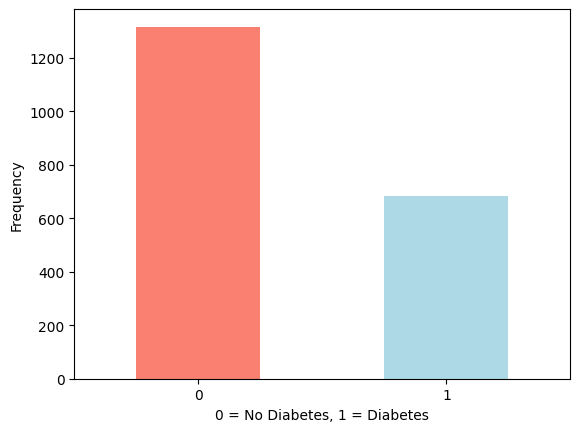

In [12]:
df['Outcome'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('0 = No Diabetes, 1 = Diabetes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Data Cleaning

In [13]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,13
BloodPressure,90
SkinThickness,573
Insulin,956
BMI,28
DPF,0
Age,0
Outcome,0


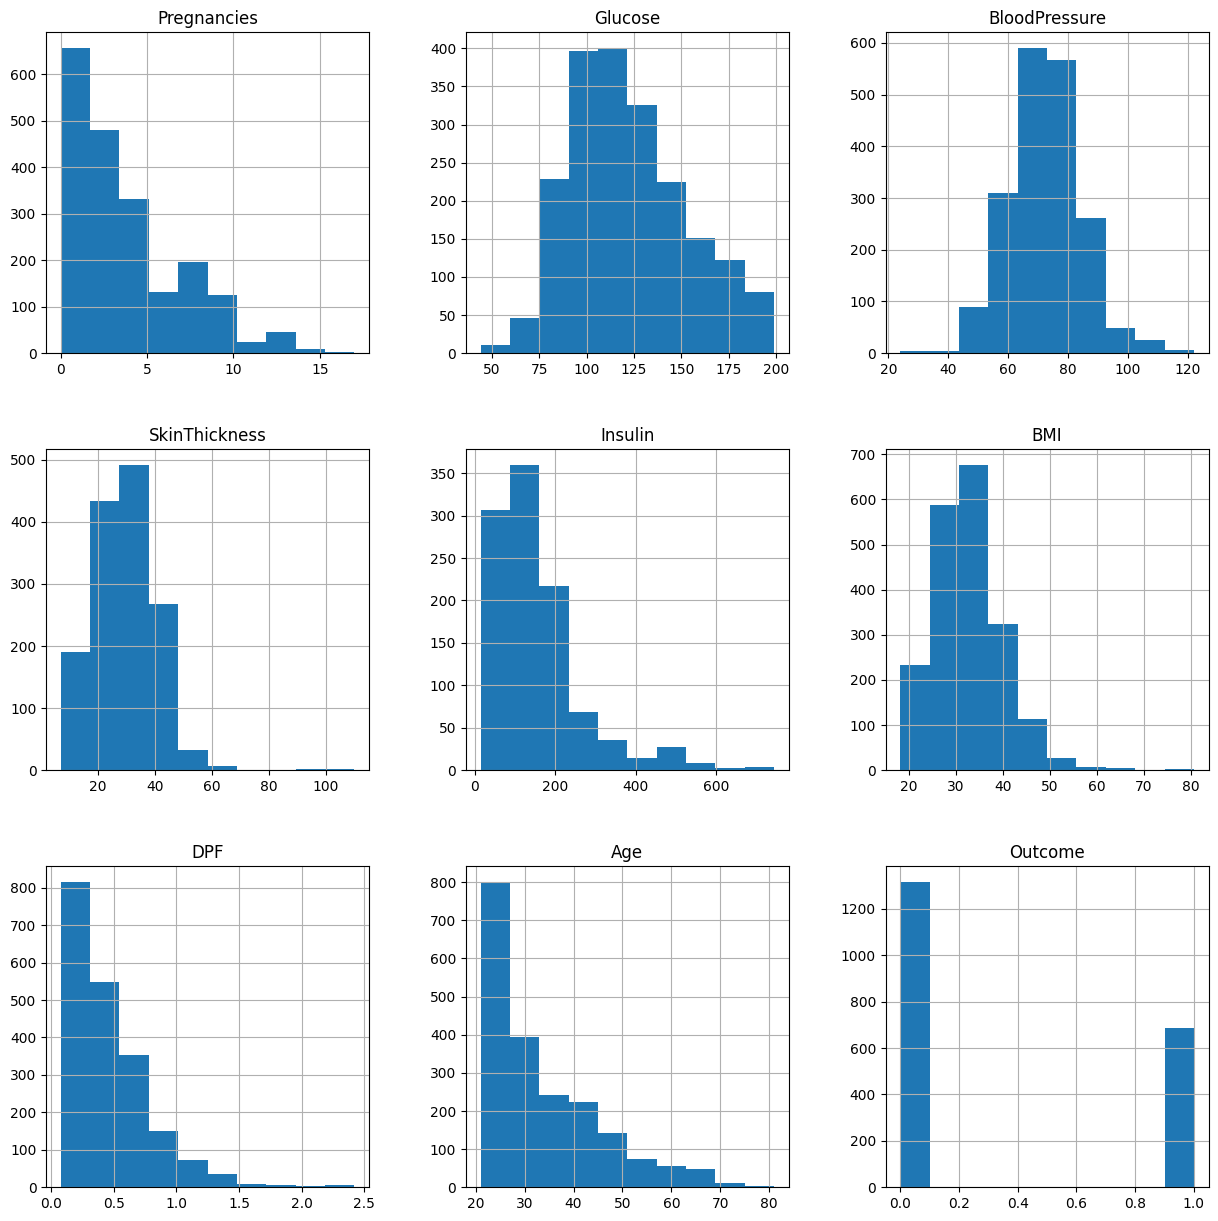

In [14]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [15]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

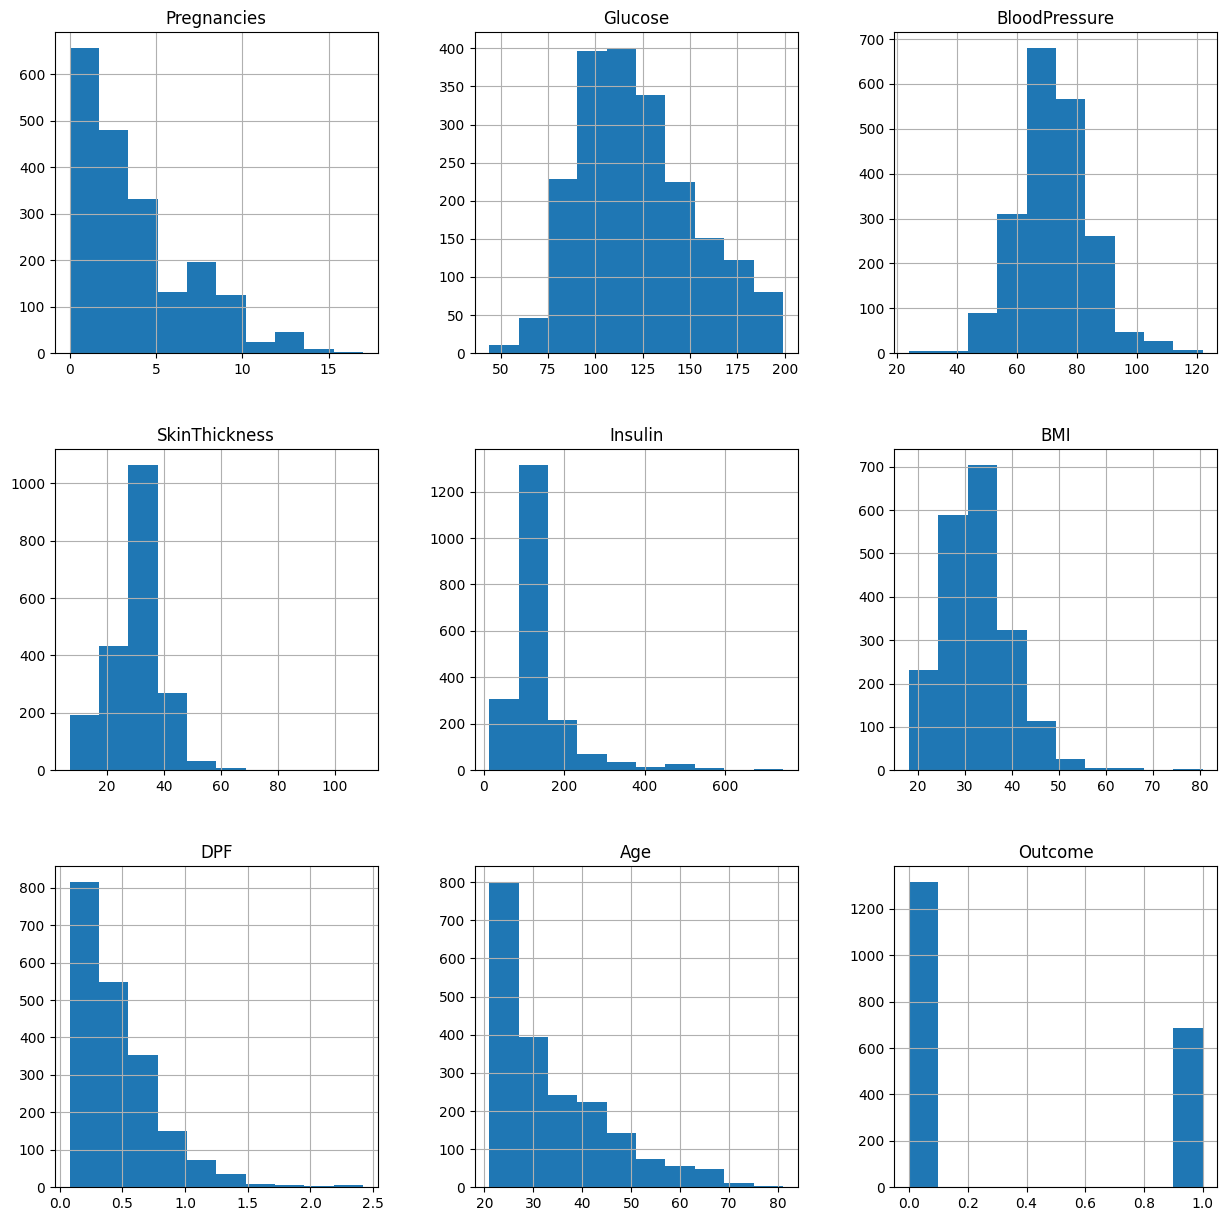

In [16]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

In [17]:
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DPF,0
Age,0
Outcome,0


## Correlation Matrix

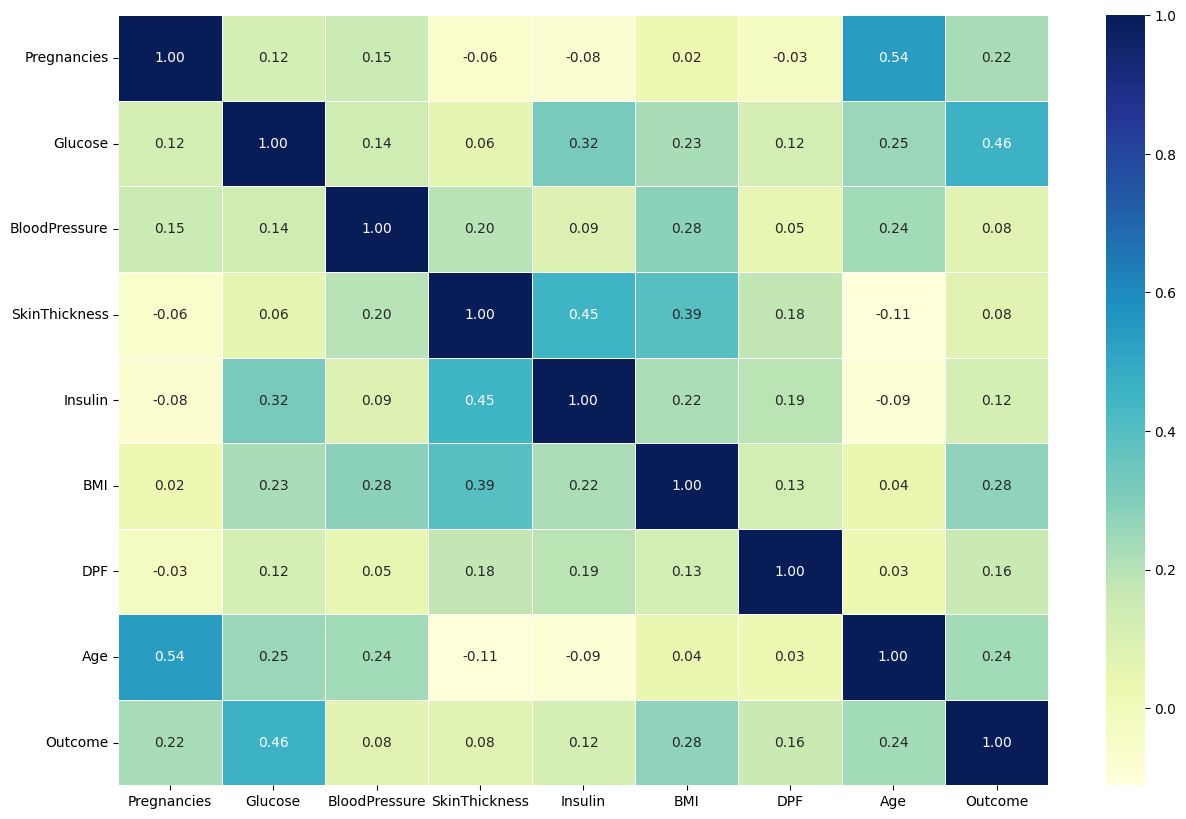

In [18]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')
plt.show()

**Negative Correlation** means one variable increases as the other decreases

**Positive Correlation** means one variable increases as the other

## Model Preparation

In [19]:
# Split the data
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
# Splitting in trainning and testing sets
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=14)

In [21]:
print(y_test.unique())
len(y_train)

[1 0]


1600

This is a Classification Problem, so we are going to test:

- Logistic Regression
- K-Neighbors Classifier
- Random Forest Classifier
- Decision Tree
- Support Vector Classifier

In [22]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'SVM': SVC()}

# Function to fit and score the models
def models_score(models, x_train, x_test, y_train, y_test):
  model_scores = {}    # dictionary to keep model scores
  for name, model in models.items():    # loop through the models
    model.fit(x_train, y_train)
    model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [23]:
model_scores = models_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.7725,
 'KNN': 0.8025,
 'Random Forest': 0.97,
 'Decision Tree': 0.9575,
 'SVM': 0.785}

## Model Comparision

<Axes: >

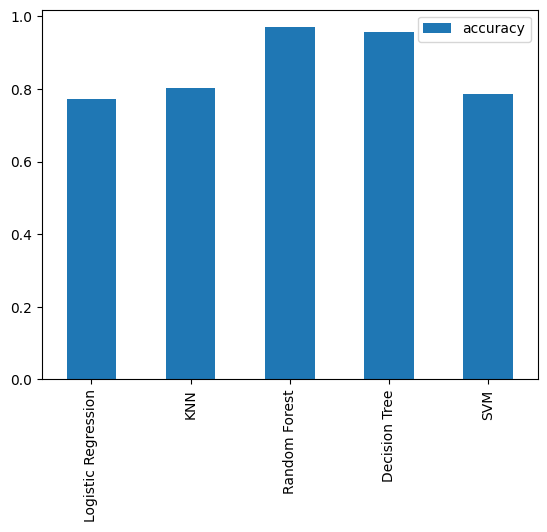

In [24]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

## Hyperparameter Tuning using Grid Search

In [25]:
# Feature Scalling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
# Creating a function to calculate best model
def find_best_model(x, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },

        'knn': {
            'model': KNeighborsClassifier(),
            'parameters': {
                'n_neighbors': [3,5,10]
            }
        },

        'random_forest': {
                    'model': RandomForestClassifier(criterion='gini'),
                    'parameters': {
                        'n_estimators': [10,15,20,50,100,200]
            }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },

        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(x_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.771875
1,knn,{'n_neighbors': 3},0.827500
2,random_forest,{'n_estimators': 200},0.951875
3,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.904375
4,svm,"{'C': 20, 'kernel': 'rbf'}",0.865625


In [27]:
scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=0), x_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


## Hyperparameter on Random Forest

In [28]:
# Hyperparameters for Random Forest
rf_grid = {'n_estimators': np.arange(100,1000,400),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2,10,3),
           'min_samples_leaf': np.arange(2,10,3)}

In [29]:
# Setup grid hyperparameter for Random Forest Model
gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=3,
                     verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([2, 5, 8]),
                         'min_samples_split': array([2, 5, 8]),
                         'n_estimators': array([100, 500, 900])},
             verbose=True)

In [30]:
# Best Hyperparameter
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [31]:
# Accuracy
gs_rf.score(x_test, y_test)

0.9475

In [32]:
y_preds = gs_rf.predict(x_test)

In [33]:
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [34]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[264  10]
 [ 11 115]]


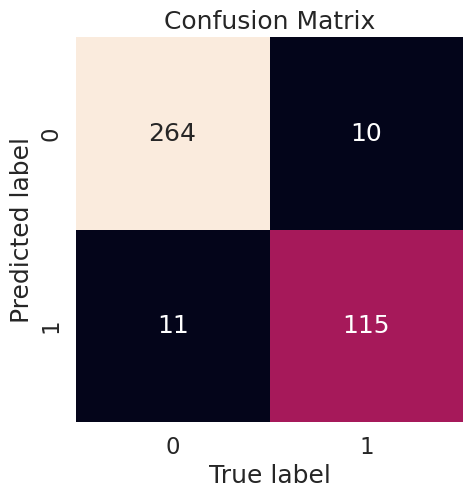

In [35]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(5,5))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False,
                   fmt='g')
  plt.xlabel('True label')
  plt.ylabel('Predicted label')
  plt.title('Confusion Matrix')

plot_conf_mat(y_test, y_preds)

In [36]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       274
           1       0.92      0.91      0.92       126

    accuracy                           0.95       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.95      0.95       400



## Model Building

In [37]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=2,min_samples_split=2,)
"""'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100"""
classifier.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2)

# Predictions

In [38]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [39]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [40]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


In [41]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.
